Instead of an iterative solution, the first law can be used to derive a differential equation describing the temperature of air in the tank:
$$\frac{dT_t}{dt} = \frac{\dot{m}(h_{in}-u_t(t))}{c_{v,t}m_t(t)}$$

This can also be solved numerically using the property polynomials. Similar to the iterative solution, we define functions for these properties

In [20]:
## function for cp of air (from table A-2c)
def cp(T):
	cpVal= 28.11 + 0.1967e-2*T +0.4802e-5*T**2 - 1.966e-9*T**3
	cpVal = cpVal/28.97
	return cpVal

## function of enthalpy of air
def h(T):
	hVal= 28.11*T + 0.1967e-2*T**2/2 +0.4802e-5*T**3/3 - 1.966e-9*T**4/4
	hVal = hVal/28.97
	return hVal

## function for internal energy of air
def u(T):
	hVal= 28.11*T + 0.1967e-2*T**2/2 +0.4802e-5*T**3/3 - 1.966e-9*T**4/4
	uVal = hVal/28.97 - 0.287*T
	return uVal

Note that $c_p$ is evaluated using the polynomials and will be converted to $c_v$ at a later stage.
To solve the differential equation, we will need to import scipy.integrate and numpy 

In [21]:
from scipy import integrate, interpolate
import numpy as np

Define a function returining the temperature and mass time derivatives (i.e., the ODEs we are solving) 

In [22]:
## System of differential equations for T and m
def dTdt(y, t):
    #y:T
    R = 0.287 ## kJ/kg/K
    mDot = 5.858e-3
    dy = np.array([(mDot*h(450) - mDot*u(y[0])) / (y[1] * (cp(y[0])-R)), mDot])

    return dy

Define the initial conditions: 

In [23]:
## Initial conditions
T0=298
m0=100*0.2/0.287/T0
y0=[T0,m0]

Define the domain (time) and integrate the system of ODEs

In [24]:
## Call integrator 
t = np.linspace(0, 100, 200)
y = integrate.odeint(dTdt, y0, t)

In [25]:
y = np.append(y,np.array([ y[:,1]*0.287*y[:,0]/0.2]).T, axis=1)

The solution can than be plotted: 

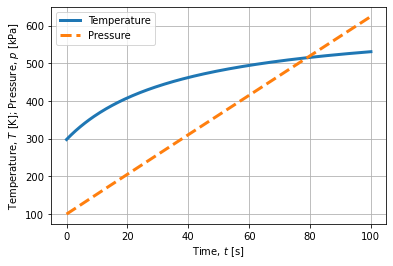

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(t,y[:,0],label='Temperature',linewidth=3)
ax.plot(t,(y[:,2]),label='Pressure',linewidth=3,linestyle='--')
ax.grid('on')
ax.set_ylabel(R'Temperature, $T$ [K]; Pressure, $p$ [kPa]')
ax.set_xlabel(R'Time, $t$ [s]')
ax.legend()

To find the required $\Delta t$ to reach 500 kPa, we can estimate this from plot, or interpolate from the solution:

In [27]:
## Output time required reach p=500kPa
f = interpolate.interp1d(y[:,2],t)
print('t={:4.3g} s'.format(f(500)))

## Output temperature at p=500kPa
f = interpolate.interp1d(y[:,2],y[:,0])
print('T={:4.3g} K'.format(f(500)))
    
## Output mass at p=500kPa
f = interpolate.interp1d(y[:,2],y[:,1])
print('m={:4.3g} kg'.format(f(500)))

t=76.1 s
T= 512 K
m=0.68 kg


While perhaps more complex, solution of the differential equation (rather than iteration) provides much more insight to the process and facilitates additional analyses. 